# Best Business Place in Kanpur

<h3>Introduction/Business Problem</h3>

Find a suitable cluster of locations in the city Kanpur of Uttar Pradesh, India to open a business particularly dealing with food.

<h3>Data</h3>

FourSquare API is used to get venues
<br>
Latitute and longitude of various places of Kanpur are manually collected

In [3]:
import pandas as pd
import numpy as np
import folium
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
CLIENT_ID = '3IUT4PW5215DP5MLXBOK1BO2DR2PSAZBVSLHQBMIZDPSQCSV' # your Foursquare ID
CLIENT_SECRET = 'DMQF43K2IS42VOO3CXP5YLYZMU1FHSYPF231FV2VWPUTPYBF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [60]:
locations = [
    ["Nawabganj", "26.492607","80.301811"],
    ["Barra", "26.427971","80.296242"],
    ["Yashoda Nagar", "26.4034","80.3368"],
    ["Arya Nagar", "26.4834","80.3217"],
    ["Ashok Nagar", "26.4713","80.3172"],
    ["Azad Nagar", "26.4543","80.2786"],
    ["Bhauti", "26.4476","80.1934"],
    ["Chowk Sarafa", "26.4697","80.3496"],
    ["Chunni Ganj", "26.4781","80.3359"],
    ["Civil Lines", "26.4750","80.3533"],
    ["Darshan Purwa", "26.4629","80.3200"],
    ["Defence Colony", "26.4276","80.3979"],
    ["Fazalganj", "26.4591","80.3032"],
    ["Ghumni Bazar", "26.4664","80.3506"],
    ["Govind Nagar", "26.442","80.3094"],
    ["Indira Nagar", "26.5090","80.2642"],
    ["Harjinder Nagar", "26.4235","80.3916"],
    ["Harsh Nagar", "26.4729","80.3150"],
    ["Jawahar Nagar", "26.4684","80.3220"],
    ["Kakadeo", "26.4802","80.2907"],
    ["Kalyanpur", "26.5108","80.2469"],
    ["Kaushal Puri", "26.4678","80.3123"],
    ["Kidwai Nagar", "26.4275","80.3353"],
    ["Koyla Nagar", "26.3966","80.3610"],
    ["Lajpat Nagar", "26.4688","80.3067"],
    ["Lakhanpur", "26.4945","80.2796"],
    ["Lal Bangla", "26.4268","80.3867"],
    ["Mall Road", "26.4732","80.352"],
    ["Nirala Nagar", "26.4426","80.3117"],
    ["Naubasta", "26.4018","80.3145"],
    ["Nayaganj", "26.4625","80.3534"],
    ["Pandu Nagar", "26.4733","80.2976"],
    ["Panki", "26.4705","80.2407"],
    ["Ratan Lal Nagar", "26.4434","80.2865"],
    ["Saket Nagar", "26.4329","80.3126"],
    ["Sarvodaya Nagar", "26.4797","80.3060"],
    ["Shastri Nagar", "26.4639","80.3006"],
    ["Shyam Nagar", "26.4077","80.3683"],
    ["Swaroop Nagar", "26.4878","80.3206"],
    ["Shanti Nagar", "26.4535","80.3610"],
    ["Sharda Nagar", "26.4861","80.2857"],
    ["Singhpur", "26.5232","80.2586"],
    ["Vikas Nagar", "26.4933","80.2847"],
    ["Vishnupuri", "26.4943","80.3164"],
    ["Tatya Tope Nagar", "26.4342","80.2809"],
    ["Tilak Nagar", "26.4896","80.3225"],
]


In [120]:
df = pd.DataFrame(locations, columns=["Neighborhood", "Latitude", "Longitude"])
df.head(10)

,Neighborhood,Latitude,Longitude
0,Nawabganj,26.492607,80.301811
1,Barra,26.427971,80.296242
2,Yashoda Nagar,26.4034,80.3368
3,Arya Nagar,26.4834,80.3217
4,Ashok Nagar,26.4713,80.3172
5,Azad Nagar,26.4543,80.2786
6,Bhauti,26.4476,80.1934
7,Chowk Sarafa,26.4697,80.3496
8,Chunni Ganj,26.4781,80.3359
9,Civil Lines,26.4750,80.3533


In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
df_venues = getNearbyVenues(df['Neighborhood'], df['Latitude'], df['Longitude'])

Nawabganj
Barra
Yashoda Nagar
Arya Nagar
Ashok Nagar
Azad Nagar
Bhauti
Chowk Sarafa
Chunni Ganj
Civil Lines
Darshan Purwa
Defence Colony
Fazalganj
Ghumni Bazar
Govind Nagar
Indira Nagar
Harjinder Nagar
Harsh Nagar
Jawahar Nagar
Kakadeo
Kalyanpur
Kaushal Puri
Kidwai Nagar
Koyla Nagar
Lajpat Nagar
Lakhanpur
Lal Bangla
Mall Road
Nirala Nagar
Naubasta
Nayaganj
Pandu Nagar
Panki
Ratan Lal Nagar
Saket Nagar
Sarvodaya Nagar
Shastri Nagar
Shyam Nagar
Swaroop Nagar
Shanti Nagar
Sharda Nagar
Singhpur
Vikas Nagar
Vishnupuri
Tatya Tope Nagar
Tilak Nagar


In [118]:
df_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barra,26.427971,80.296242,Axis Bank ATM,26.423720,80.295840,ATM
1,Yashoda Nagar,26.4034,80.3368,Axis Bank ATM,26.401577,80.341095,ATM
2,Arya Nagar,26.4834,80.3217,Upper Crust,26.482225,80.320857,Bakery
3,Arya Nagar,26.4834,80.3217,Mithas,26.485217,80.321400,Indian Restaurant
4,Arya Nagar,26.4834,80.3217,"Aromas, Arya Nagar",26.482953,80.318024,Fast Food Restaurant
5,Arya Nagar,26.4834,80.3217,cafe coffee day,26.483661,80.320399,Coffee Shop
6,Arya Nagar,26.4834,80.3217,Makhan Singh (Biryani Spot),26.481089,80.321161,Fast Food Restaurant
7,Arya Nagar,26.4834,80.3217,KD Palace,26.480891,80.321732,Indian Restaurant
8,Arya Nagar,26.4834,80.3217,Mr Brown Bakery,26.486043,80.323756,Bakery
9,Arya Nagar,26.4834,80.3217,Ganges Club,26.480379,80.323979,Club House


In [69]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighborhood,ATM,Afghan Restaurant,Asian Restaurant,Awadhi Restaurant,Bakery,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,...,Mexican Restaurant,Multiplex,Park,Pizza Place,Plaza,Restaurant,Shop & Service,Shopping Mall,Spa,Tea Room
0,Barra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yashoda Nagar,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arya Nagar,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,ATM,Afghan Restaurant,Asian Restaurant,Awadhi Restaurant,Bakery,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,...,Mexican Restaurant,Multiplex,Park,Pizza Place,Plaza,Restaurant,Shop & Service,Shopping Mall,Spa,Tea Room
0,Arya Nagar,0.0,0.0,0.0,0.000000,0.20,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
1,Ashok Nagar,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.250000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.25
2,Azad Nagar,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
3,Barra,1.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
4,Chowk Sarafa,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.166667,0.000000,0.000000,0.0,0.00,0.0,0.166667,0.0,0.00
5,Civil Lines,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.100000,0.000000,0.100000,0.0,0.00,0.0,0.100000,0.0,0.00
6,Darshan Purwa,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
7,Defence Colony,0.0,0.0,0.0,0.000000,0.20,0.0,0.2,0.000000,0.0,...,0.2,0.000000,0.000000,0.000000,0.0,0.20,0.0,0.000000,0.2,0.00
8,Fazalganj,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00
9,Ghumni Bazar,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00


In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arya Nagar,Indian Restaurant,Fast Food Restaurant,Bakery,Coffee Shop,Club House,Tea Room,Bus Station,Clothing Store,Camera Store,Café
1,Ashok Nagar,Hotel,Tea Room,Park,Breakfast Spot,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station
2,Azad Nagar,Diner,Dessert Shop,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station,Breakfast Spot
3,Barra,ATM,Dessert Shop,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station,Breakfast Spot
4,Chowk Sarafa,Dessert Shop,Shopping Mall,Clothing Store,Multiplex,Cosmetics Shop,Bus Station,Convenience Store,Coffee Shop,Club House,Camera Store


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

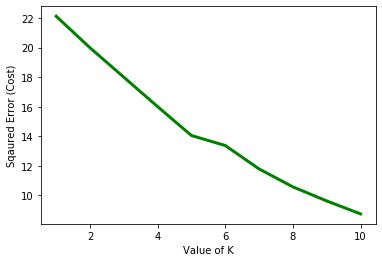

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df_grouped.drop('Neighborhood', 1)) 
      
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt

In [101]:

# set number of clusters
kclusters = 6

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([1, 3, 1, 4, 1, 1, 1, 1, 5, 2], dtype=int32)

In [104]:
neighborhoods_venues_sorted.drop("Cluster Labels", 1, inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [113]:
df_merged = df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
df_merged.dropna(inplace=True)
df_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barra,26.427971,80.296242,4.0,ATM,Dessert Shop,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station,Breakfast Spot
2,Yashoda Nagar,26.4034,80.3368,4.0,ATM,Dessert Shop,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station,Breakfast Spot
3,Arya Nagar,26.4834,80.3217,1.0,Indian Restaurant,Fast Food Restaurant,Bakery,Coffee Shop,Club House,Tea Room,Bus Station,Clothing Store,Camera Store,Café
4,Ashok Nagar,26.4713,80.3172,3.0,Hotel,Tea Room,Park,Breakfast Spot,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station
5,Azad Nagar,26.4543,80.2786,1.0,Diner,Dessert Shop,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Bus Station,Breakfast Spot
7,Chowk Sarafa,26.4697,80.3496,1.0,Dessert Shop,Shopping Mall,Clothing Store,Multiplex,Cosmetics Shop,Bus Station,Convenience Store,Coffee Shop,Club House,Camera Store
9,Civil Lines,26.4750,80.3533,1.0,Fast Food Restaurant,Diner,Multiplex,Dessert Shop,Clothing Store,Café,Cosmetics Shop,Pizza Place,Shopping Mall,Bakery
10,Darshan Purwa,26.4629,80.3200,1.0,Electronics Store,Tea Room,Bus Station,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Breakfast Spot
11,Defence Colony,26.4276,80.3979,1.0,Spa,Restaurant,Bakery,Bookstore,Mexican Restaurant,Tea Room,Bus Station,Coffee Shop,Club House,Clothing Store
12,Fazalganj,26.4591,80.3032,5.0,Indian Restaurant,Tea Room,Bus Station,Convenience Store,Coffee Shop,Club House,Clothing Store,Camera Store,Café,Breakfast Spot


In [121]:
map_clusters = folium.Map(location=[26.4499, 80.3319], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [125]:
df_merged[df_merged["Cluster Labels"] == 1.0]["Neighborhood"].unique()

array(['Arya Nagar', 'Azad Nagar', 'Chowk Sarafa', 'Civil Lines',
       'Darshan Purwa', 'Defence Colony', 'Govind Nagar',
       'Harjinder Nagar', 'Jawahar Nagar', 'Kalyanpur', 'Lajpat Nagar',
       'Mall Road', 'Nirala Nagar', 'Naubasta', 'Nayaganj', 'Pandu Nagar',
       'Panki', 'Swaroop Nagar', 'Sharda Nagar', 'Singhpur', 'Vishnupuri',
       'Tatya Tope Nagar', 'Tilak Nagar'], dtype=object)